# Machine Learning Dataset

## Importing libraries and cleaned data

Data is taken from an actual dairy based near Chittorgarh, Rajasthan. Data was organised in folders based on years and entries for each date in an excel file. Data was scraped using a Python code and was cleaned of all N/A values, outlier informations, and values that did not match value field constraints - like fat is between 3-10. 

### The dataset has approximately 13000 records for around 28 unique sellers from Aug 2017 - Dec 2018

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15,9)})

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head()

,Acc,Cans,Kilograms,Fat,SNF,Date,Shift
0,949,2,66,5.7,8.9,2017-08-25,0
1,795,3,100,6.2,8.8,2017-08-25,1
2,3665,2,57,6.2,9.0,2017-08-25,1
3,865,2,50,6.7,8.8,2017-08-25,1
4,2959,2,51,6.9,8.9,2017-08-25,1


### Basic stats for data

In [5]:
df.describe()

,Acc,Cans,Kilograms,Fat,SNF,Shift
count,13145.000000,13145.000000,13145.000000,13145.000000,13145.000000,13145.000000
mean,1689.695930,1.854545,55.312058,5.640679,8.491541,0.500038
std,1207.145918,1.272332,49.985005,1.142996,0.264883,0.500019
min,455.000000,1.000000,1.000000,2.400000,5.200000,0.000000
25%,865.000000,1.000000,26.000000,5.000000,8.300000,0.000000
50%,925.000000,1.000000,40.000000,5.700000,8.500000,1.000000
75%,2959.000000,2.000000,67.000000,6.400000,8.700000,1.000000
max,3691.000000,14.000000,552.000000,9.900000,9.200000,1.000000


### Account collection details

In [17]:
df['Acc'].value_counts()

2959    962
1516    844
893     842
460     840
1725    814
3680    688
925     686
949     674
865     666
873     666
871     649
457     642
786     636
3516    504
3691    476
3536    464
3690    438
455     378
3665    340
877     242
1872    228
497     224
795      66
1588     62
471      52
1579     50
855      10
1576      2
Name: Acc, dtype: int64

In [18]:
acc_list = [2959, 1516, 893, 460, 1725, 3680, 925, 949, 865, 873, 871, 457, 786, 3516, 3691, 3536, 3690, 455, 3665, 877, 1872, 497, 795, 1588, 471, 1579, 855, 1576]

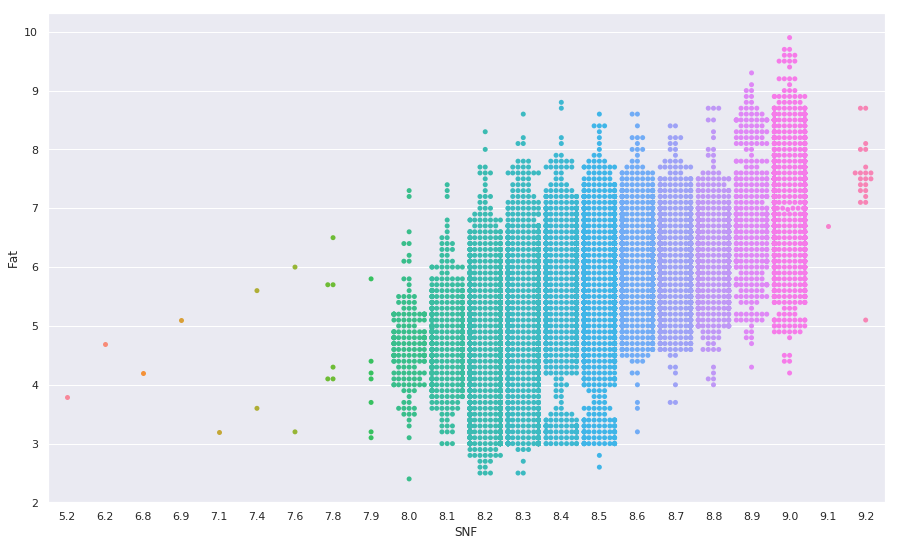

In [47]:
sns.swarmplot(y = 'Fat', x = 'SNF', data = df)

## Plotting a random account number for distribution

### Fat is related to the animal husbandry techniques used

Here, due to the variation in seasons (most milk in winters) and the fact that there were two winter cycles, we can see that there is a spike in fat values near the average zone. The spike at 3 corresponds to cow's milk which has very low fat content. 

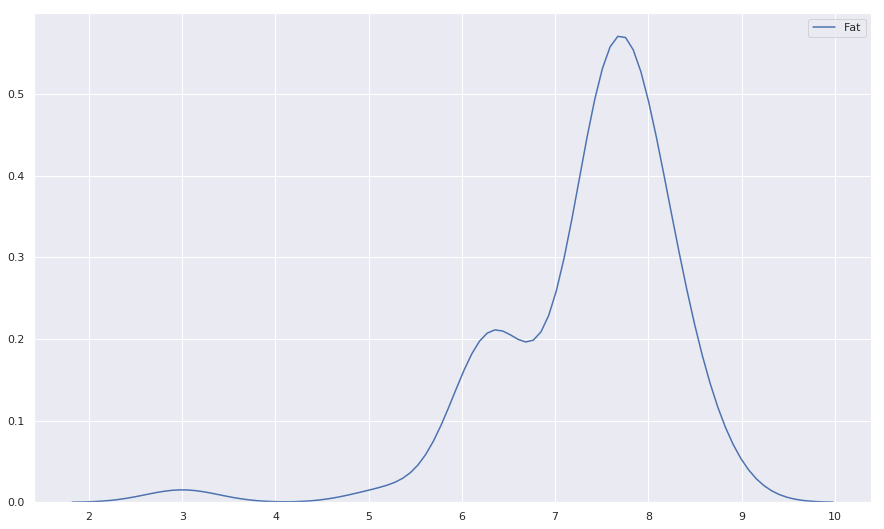

In [49]:
sns.kdeplot(df[df['Acc'] == 795]['Fat'])

### Quantity is both related to the husbandry conditions, and the adultration content. 

The collection centers have a strong policy of fat and clr values. Milk having a high fat value can be diluted to make more milk. Also, fatness is inversely proportional to quantity, so we can see that the rising and downfall follow different trends as high fat milk was diluted during the rising and low fat milk cannot be diluted further. 

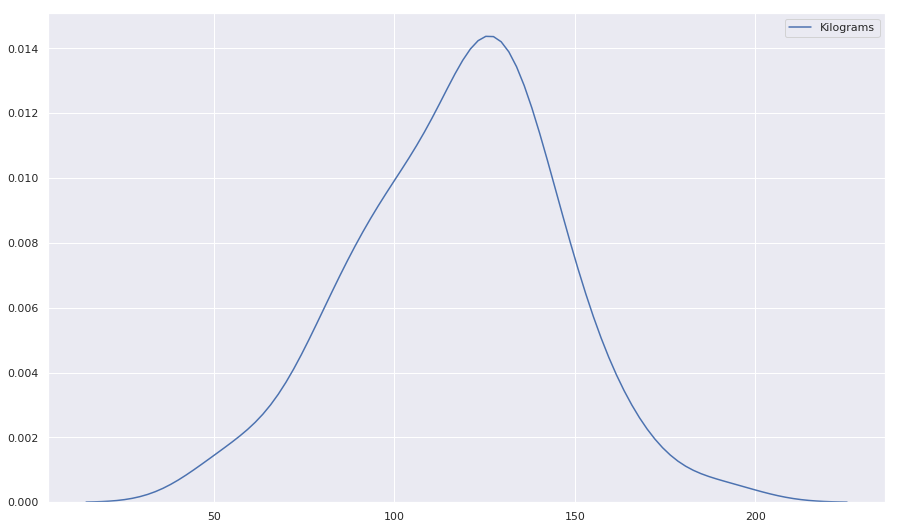

In [22]:
sns.kdeplot(df[df['Acc'] == 795]['Kilograms'])

### SNF relates to the milk quality. 

We can see that there are two peaks. First corresponding to the normal average SNF that is accepted. The second one is near 9 as the limit of SNF taken is 9. So, most collection centers round off to 9 accounting for the spike. 

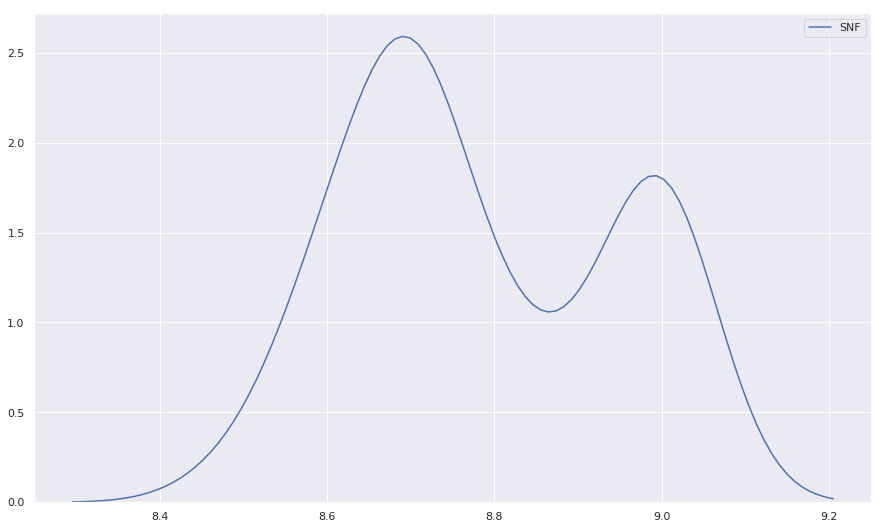

In [21]:
sns.kdeplot(df[df['Acc'] == 795]['SNF'])

## Understanding different sellers

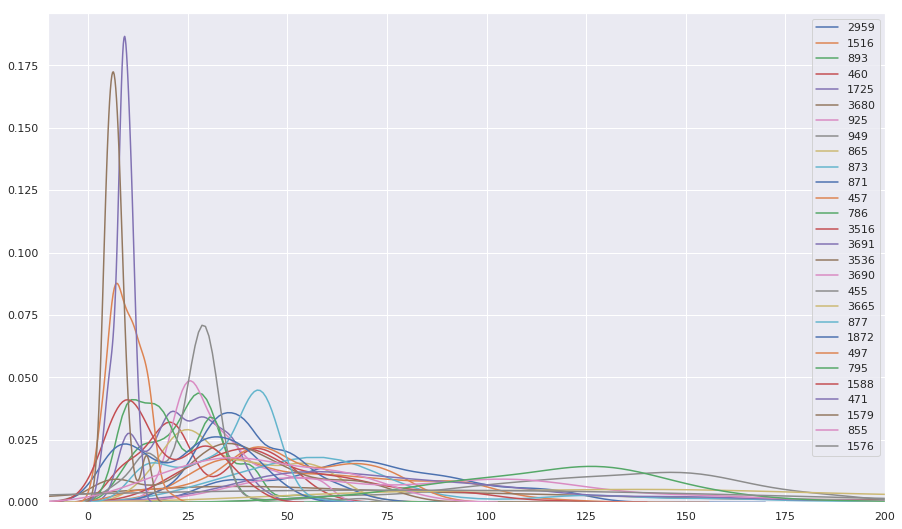

In [36]:
for i in acc_list:
    sns.kdeplot(df[df['Acc'] == i]['Kilograms'], label = i)
    plt.xlim((-10, 200))

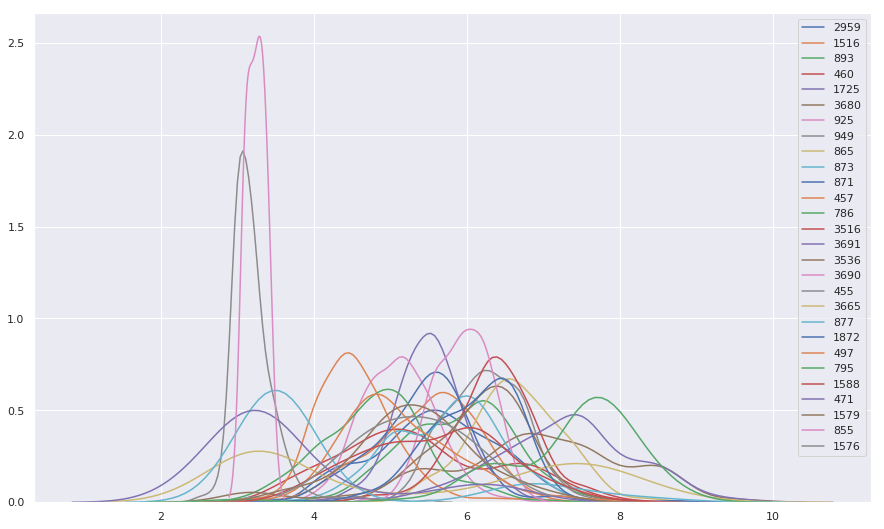

In [37]:
for i in acc_list:
    sns.kdeplot(df[df['Acc'] == i]['Fat'], label = i)

LinAlgError: singular matrix

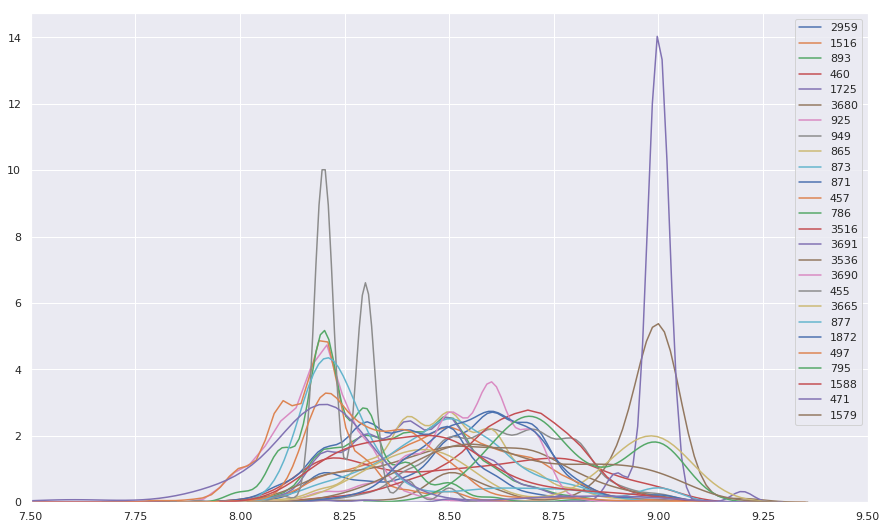

In [38]:
for i in acc_list:
    sns.kdeplot(df[df['Acc'] == i]['SNF'], label = i)
    plt.xlim((7.5, 9.5))

AttributeError: 'str' object has no attribute 'conjugate'

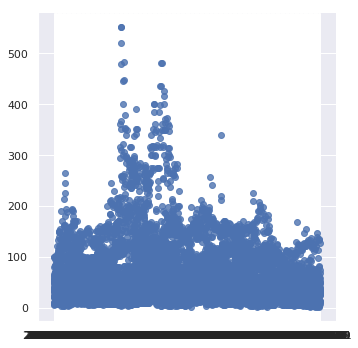

In [29]:
sns.lmplot(x = 'Date', y = 'Kilograms', data = df)

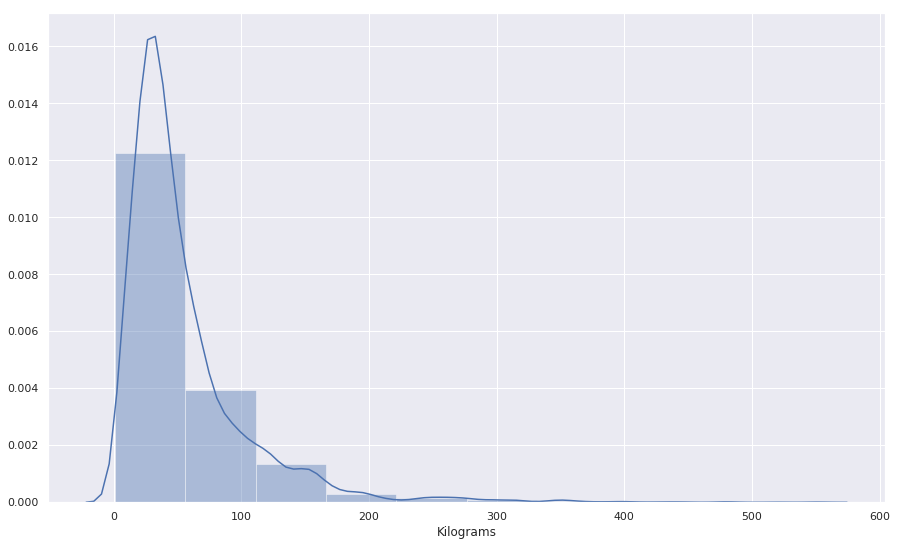

In [30]:
sns.distplot(df['Kilograms'], kde = True, bins = 10)